In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('dark_background')

In [47]:
def get_all_month_data():
    """ 
    Returns all months data in pandas DataFrame
    """
    files = [file for file in os.listdir("Sales_data/")]
    all_months_data = pd.DataFrame()
    
    for file in files:
        df = pd.read_csv("Sales_data/"+file)
        all_months_data = pd.concat([all_months_data, df])
    
    return all_months_data

In [129]:
def save_to_csv():
    """
    Take all months data and saves to csv format
    """
    df = get_all_month_data()
    df = df.reset_index()
    df.drop('index', axis=1, inplace=True)
    return df.to_csv("main_data.csv", index=False)

save_to_csv()

In [139]:
df = pd.read_csv("main_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Data Cleaning

In [140]:
df = df[df['Order Date'].str[:2] != 'Or'] #removes data where Order Date starts from 'Or'

In [141]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [142]:
df.isna().sum() #how many null values are present in dataset

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [143]:
df = df.dropna() #drop NaN values

### Data Augmentation

In [144]:
#make month column
df['month'] = df['Order Date'].str[:2]
df['month'].astype('int') 

0         12
1         12
2         12
3         12
4         12
          ..
186845     6
186846     6
186847     6
186848     6
186849     6
Name: month, Length: 185950, dtype: int64

In [145]:
##Convert columns to their respective datatype
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [146]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12
7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12
8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12
9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12


In [147]:
#Extracting City from purchase date and storing it in new column
df['city'] = df['Purchase Address'].apply(lambda i: i.split(',')[1] +  ' ' + 
                                          i.split(',')[2].split(' ')[1])

In [148]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta GA


In [149]:
df['Hour'] = df['Order Date'].dt.hour  #add Hour column to data

In [150]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each'] #Add sales column to data

In [151]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,Hour,Sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City NY,0,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City NY,7,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City NY,18,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco CA,15,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta GA,12,11.95


### Analysis

##### Which Product sales is more?

In [169]:
product_sales = df.groupby('Product')
product_sales.count()['Quantity Ordered'].sort_values(ascending=False)

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

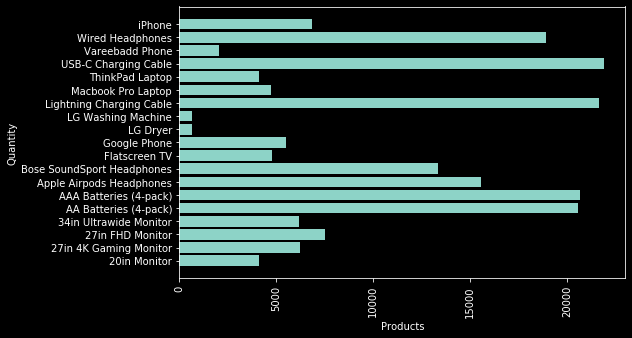

In [183]:
plt.figure(figsize=(8,5))
products = [product for product, group in product_sales]
plt.barh(products, product_sales.count()['Quantity Ordered'])
plt.xlabel("Products")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.show()

##### Which month has more sales?

In [185]:
sales_per_month = df.groupby('month').sum()
sales_per_month

,Quantity Ordered,Price Each,Hour,Sales
month,,,,
01,10903,1.811768e+06,139485,1.822257e+06
02,13449,2.188885e+06,172669,2.202022e+06
03,17005,2.791208e+06,218969,2.807100e+06
04,20558,3.367671e+06,262259,3.390670e+06
05,18667,3.135125e+06,238780,3.152607e+06
06,15253,2.562026e+06,195528,2.577802e+06
07,16072,2.632540e+06,206169,2.647776e+06
08,13448,2.230345e+06,172289,2.244468e+06
09,13109,2.084992e+06,168513,2.097560e+06


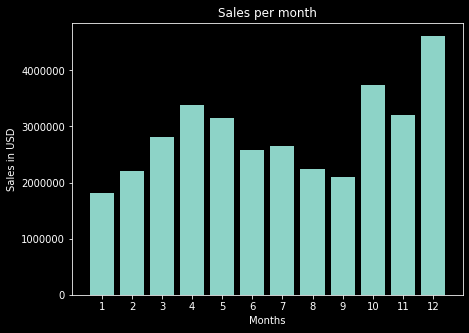

In [188]:
months = range(1, 13)
plt.figure(figsize=(7,5))
plt.bar(months, sales_per_month['Sales'])
plt.title("Sales per month")
plt.xlabel("Months")
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.show()

##### On which time we have more sales in a day?

In [191]:
sales_in_day = df.groupby('Hour')
sales_in_day.count()['Sales']

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

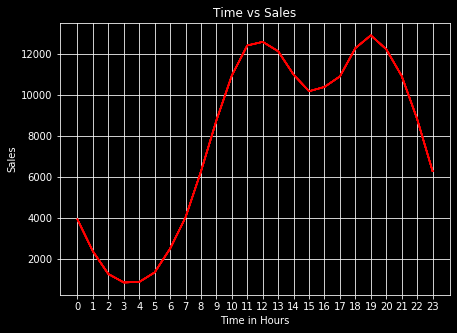

In [210]:
Hours = range(0,24)
plt.figure(figsize=(7,5))
plt.plot(Hours, sales_in_day, color="red")
plt.title("Time vs Sales")
plt.xlabel("Time in Hours")
plt.ylabel("Sales")
plt.xticks(Hours)
plt.grid()
plt.show()

##### On which month MacBook Pro Laptop sale is high?

In [244]:
macbook_pro_sales = df[df['Product'] == 'Macbook Pro Laptop'].groupby('month')
macbook_pro_sales.count()['Quantity Ordered']

month
01    235
02    276
03    379
04    452
05    464
06    355
07    368
08    299
09    288
10    525
11    440
12    643
Name: Quantity Ordered, dtype: int64

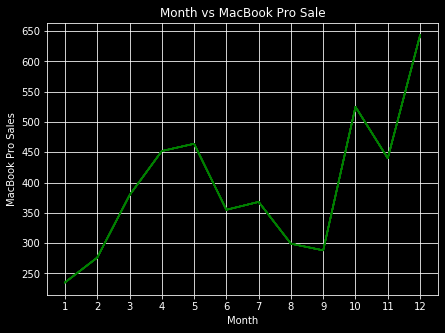

In [245]:
plt.figure(figsize=(7,5))
plt.plot(months, macbook_pro_sales.count(), color="g")
plt.title("Month vs MacBook Pro Sale")
plt.xlabel("Month")
plt.ylabel("MacBook Pro Sales")
plt.xticks(months)
plt.grid()
plt.show()